## DataLoaders requirements

* Use X and y
* In-memory or on-disk np.arrays
* Slice the dataset (select variables and/ or sequence steps)
* Use item tfms and/ or batch tfms
* Create batch with specified types (TSTensor, Category, etc)
* Use item & batch tfms
* Show batch (with tfms)
* Good performance (similar to Pytorch, better than fastai v1, vanilla fastai v2

## Import libraries

In [1]:
import sys
import os
ISCOLAB = 'google.colab' in sys.modules
if ISCOLAB:
    if not os.path.isdir('/content/timeseriesAI2'):
        !pip install git+https://github.com/fastai/fastai2 
        !pip install git+https://github.com/fastai/fastcore 
        !pip install pyunpack
        !pip install sktime
        !git clone https://github.com/timeseriesAI/timeseriesAI2.git
        %cd timeseriesAI2
    else: 
        path = !pwd
        if path != ['/content/timeseriesAI2']: 
            %cd timeseriesAI2
        !pwd

  Cloning https://github.com/fastai/fastai2 to /tmp/pip-req-build-_nwa19b2
  Running command git clone -q https://github.com/fastai/fastai2 /tmp/pip-req-build-_nwa19b2
  Created wheel for fastai2: filename=fastai2-0.0.17-cp36-none-any.whl size=186716 sha256=ef9457ee435dcacadcf2d55679dcd1c03926c7d262fa4fdfc314aae87adbea27
  Stored in directory: /tmp/pip-ephem-wheel-cache-r2jns1ng/wheels/a1/59/9a/50335b36924b827e29d5f40b41fc3a008cc1f30dd80e560dfd
Successfully built fastai2
  Cloning https://github.com/fastai/fastcore to /tmp/pip-req-build-nv52f7o7
  Running command git clone -q https://github.com/fastai/fastcore /tmp/pip-req-build-nv52f7o7
  Created wheel for fastcore: filename=fastcore-0.1.17-cp36-none-any.whl size=28213 sha256=4549f2a5b6caa6cb300dee7f4019d85af51dc75d136ae734ddc48d65dbd597a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-n0w3bzgg/wheels/8a/2a/23/bc50c8f5e28776b44ac837a01fcfa675724565d4813d8e51c7
Successfully built fastcore
  Found existing installation: fastcore 0.1.

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

In [0]:
from fastai2.torch_core import *
from fastai2.data.all import *
from fastai2.learner import *
from fastai2.metrics import *
from fastai2.callback.all import *

In [0]:
from timeseries.imports import *
from timeseries.utils import *
from timeseries.data import *
from timeseries.core import *
from timeseries.models import *

## Load data

In [5]:
# dataset id
dsid = 'StarLightCurves'
X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, parent_dir='./data/UCR/', verbose=True, on_disk=True)
X_in_memory = np.concatenate((X_train, X_valid))
y_in_memory = np.concatenate((y_train, y_valid)).astype(int)
folder = './data/UCR'
np.save(f'{folder}/{dsid}/X.npy', X_in_memory)
np.save(f'{folder}/{dsid}/y.npy', y_in_memory)
X_on_disk = np.load(f'{folder}/{dsid}/X.npy', mmap_mode='r')
y_on_disk = np.load(f'{folder}/{dsid}/y.npy', mmap_mode='r').astype(int)
splits = (L(list(np.arange(len(X_train)))), L(list(np.arange(len(X_train), len(X_on_disk)))))

Dataset: StarLightCurves
...data downloaded and decompressed
X_train: (1000, 1, 1024)
y_train: (1000,)
X_valid: (8236, 1, 1024)
y_valid: (8236,) 



In [0]:
# X    = X_on_disk
# tfms = []
# preprocess = False

# tl0  = TfmdLists(X, tfms)
# ptl0 = X if is_none(tfms) else tl0 if not preprocess else tl0[:]
# typ0 = TSTensor

In [0]:
# it = idx
# res0  = TSTensor(ptl0[it]) if is_none(tfms) or is_indexer(it) else retain_type(np.stack(ptl0[it]), typ=typ0)
# t0    = res0[0]
# dt0   = tl0.decode(t0)
# res0, t0, t0.data, dt0.data

In [0]:
# y = y_in_memory
# tfms = [Categorize()]
# preprocess = True
# tl1  = TfmdLists(y, tfms)
# ptl1 = y if is_none(tfms) else tl1 if not preprocess else tl1[:]
# typ1 =type(tl1[0])

In [0]:
# it = idx

# res1  = ptl1[it] if is_none(tfms) or is_indexer(it) else retain_type(np.stack(ptl1[it]), typ=typ1)
# type(res1), res1, tl1.decode(res1)

In [0]:
# X = X_on_disk
# y = y_in_memory
# tls = None
# tfms = [None,[Categorize()]]
# kwargs = {}
# preprocess = True
# _xtype = TSTensor # default xtype
# xtype = None

# items = tuple((X,)) if y is None else tuple((X, y))
# tfms = L(ifisnotnone(tfms,[None] * len(items)))
# tls = L(tls if tls else [TfmdLists(item, t, **kwargs) for item,t in zip(items, tfms)])
# ptls = [item if is_none(tfm) else tl if not preprocess else retain_type(np.stack(tl[:]), typ=type(tl[0])) for item, tfm, tl in zip(L(items), tfms, tls)]
# types = [type(ptl[0]) for ptl in ptls]
# types[0] = ifnone(xtype, _xtype)

# tuple([typ(ptl[it]) if is_indexer(it) else retain_type(np.stack(ptl[it]), typ=typ) for i, (typ, ptl) in enumerate(zip(types, ptls))])

In [0]:
# X = X_on_disk
# y = y_in_memory
# tls = None
# tfms = [ToTSTensor,[Categorize()]]
# kwargs = {}
# preprocess = True
# _xtype = TSTensor # default xtype
# xtype = None

# items = tuple((X,)) if y is None else tuple((X, y))
# tfms = L(ifisnotnone(tfms,[None]*len(items)))
# tls = L(tls if tls else [TfmdLists(item, t, **kwargs) for item,t in zip(items, tfms)])
# # ptls = [item if is_none(tfm) else tl if not preprocess else np.stack(tl[:]) for item, tfm, tl in zip(L(items), tfms, tls)]
# ptls = [tl.items if is_none(tl.tfms) else tl if not preprocess else np.stack(tl[:]) for tl in tls]
# types = [type(tl[0]) for tl in tls]
# types[0] = ifnone(xtype, _xtype)
# tuple([cast(ptl[it],typ) for ptl, typ in zip(ptls, types)])

In [0]:
# %timeit tuple([cast(ptl[it],typ) for ptl, typ in zip(ptls, types)])

In [0]:
class NumpyDatasets(FilteredBase):
#     xtype = None
    "A dataset that creates a tuple from X (and y), and applies `item_tfms`"
    def __init__(self, X=None, y=None, items=None, tfms=None, tls=None, n_inp=None, dl_type=None, preprocess=False, xtype=None, **kwargs):
        super().__init__(dl_type=dl_type)
        if not tls:
            items = tuple((X,)) if y is None else tuple((X, y))
            tfms = L(ifisnotnone(tfms,[None]*len(items)))
        self.tls = L(tls if tls else [TfmdLists(item, t, **kwargs) for item,t in zip(items, tfms)])
        self.ptls = [tl.items if is_none(tl.tfms) else tl if not preprocess else np.stack(tl[:]) for tl in self.tls]
        types = [type(tl[0]) for tl in self.tls]
        if xtype is not None: types[0] = xtype
        self.types = types
        self.preprocess = preprocess
        self.n_inp = (1 if len(self.tls)==1 else len(self.tls)-1) if n_inp is None else n_inp

    def __getitem__(self, it):
        return tuple([cast(ptl[it],typ) for ptl,typ in zip(self.ptls, self.types)])
    
    def __getattr__(self,k): return gather_attrs(self, k, 'tls')
    def __dir__(self): return super().__dir__() + gather_attr_names(self, 'tls')
    def __len__(self): return len(self.tls[0])
    def __iter__(self): return (self[i] for i in range(len(self)))
    def __repr__(self): return coll_repr(self)
    def decode(self, o, full=True): return tuple(tl.decode(o_, full=full) for o_,tl in zip(o,tuplify(self.tls, match=o)))
    def subset(self, i): return type(self)(tls=self.tls, n_inp=self.n_inp, preprocess=self.preprocess, xtype=self.types[0])
    def _new(self, items, *args, **kwargs): return super()._new(items, tfms=self.tfms, do_setup=False, **kwargs)
    def overlapping_splits(self): return self.tls[0].overlapping_splits()
    def new_empty(self): return type(self)(tls=[tl.new_empty() for tl in self.tls], n_inp=self.n_inp)
    @property
    def splits(self): return self.tls[0].splits
    @property
    def split_idx(self): return self.tls[0].tfms.split_idx
    @property
    def items(self): return self.tls[0].items
    @items.setter
    def items(self, v):
        for tl in self.tls: tl.items = v

    def show(self, o, ctx=None, **kwargs):
        for o_,tl in zip(o,self.tls): ctx = tl.show(o_, ctx=ctx, **kwargs)
        return ctx

    @contextmanager
    def set_split_idx(self, i):
        old_split_idx = self.split_idx
        for tl in self.tls: tl.tfms.split_idx = i
        yield self
        for tl in self.tls: tl.tfms.split_idx = old_split_idx
            
            
class TSDataLoader(TfmdDL):
    do_item = noops
    def __init__(self, dataset, num_workers=0, **kwargs):
        super().__init__(dataset, num_workers=num_workers, **kwargs)
    def create_batch(self, b): return self.dataset[b]

In [0]:
bs = 128
idx = np.random.randint(len(X_in_memory), size=bs)
train_idx = np.random.randint(len(splits[0]), size=bs)
valid_idx = np.random.randint(len(splits[1]), size=bs)

In [0]:
tfms = [None,[Categorize()]]
dsets = NumpyDatasets(X_on_disk, y_on_disk, tfms=tfms, preprocess=True, splits=splits, xtype=TSTensor)
train_ds = dsets.train
valid_ds = dsets.valid

In [0]:
train_ds[train_idx], dsets.decode(itemify(train_ds[train_idx])[0])

((TSTensor(samples:128, vars:1, len:1024),
  TensorCategory([1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2,
          1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0,
          2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2,
          1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2,
          2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
          2, 2, 2, 2, 2, 0, 2, 2])),
 (TSTensor(vars:1, len:1024), '2'))

In [0]:
%timeit valid_ds[train_idx]

495 µs ± 7.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [0]:
(valid_ds.types[0](valid_ds.ptls[0][valid_idx]), valid_ds.types[1](valid_ds.ptls[1][valid_idx]))

(TSTensor(samples:128, vars:1, len:1024),
 TensorCategory([2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2,
         2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1,
         1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2,
         1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2,
         2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2,
         2, 0, 2, 2, 2, 2, 2, 2]))

In [0]:
%timeit valid_ds.types[0](valid_ds.ptls[0][valid_idx])

171 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [0]:
%timeit valid_ds.ptls[1][valid_idx]

1.75 µs ± 13.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [0]:
valid_ds.types[1]

fastai2.torch_core.TensorCategory

In [0]:
%timeit retain_type(valid_ds.ptls[1][valid_idx], typ=type(valid_ds.tls[1][0]))

580 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [0]:
%timeit valid_ds.types[1](valid_ds.ptls[1][valid_idx])

183 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [0]:
%timeit cast(valid_ds.ptls[1][valid_idx], valid_ds.types[1])

174 µs ± 2.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [0]:
%timeit valid_ds.types[1](valid_ds.ptls[1][valid_idx])

184 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [0]:
X_val = X_on_disk[splits[1]]
y_val = y_on_disk[splits[1]]

In [0]:
%timeit tuple((TSTensor(X_val[valid_idx]), torch.as_tensor(y_val[valid_idx])))

199 µs ± 839 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [0]:
%timeit valid_ds[valid_idx]

486 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [0]:
valid_ds[valid_idx]

(TSTensor(samples:128, vars:1, len:1024),
 array([3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
        1, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 3, 1, 3, 2, 2, 3, 3, 3, 3, 3, 1,
        3, 3, 3, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3, 3,
        2, 3, 2, 3, 3, 1, 3, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 1, 3, 3, 1, 2,
        3, 2, 3, 3, 3, 1, 2, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2,
        2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 3, 3]))

In [0]:
%timeit valid_ds[valid_idx]

485 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [0]:
X_valid[idx]

In [0]:
class TSDataLoader(TfmdDL):
    do_item = noops
    def __init__(self, dataset, num_workers=0, **kwargs):
        super().__init__(dataset, num_workers=num_workers, **kwargs)
    def create_batch(self, b): return self.dataset[b]

In [0]:
train_dl = TSDataLoader(train_ds, bs=64, shuffle=True)
valid_dl = TSDataLoader(valid_ds, bs=128)
xb, yb = next(iter(valid_dl))
xb, yb

(TSTensor(samples:128, vars:1, len:1024),
 TensorCategory([1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
         1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2,
         2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2,
         1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2,
         2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2,
         2, 2, 2, 2, 1, 2, 2, 0]))

In [0]:
valid_dl.dataset

(#8236) [(TSTensor(vars:1, len:1024), TensorCategory(1)),(TSTensor(vars:1, len:1024), TensorCategory(2)),(TSTensor(vars:1, len:1024), TensorCategory(2)),(TSTensor(vars:1, len:1024), TensorCategory(0)),(TSTensor(vars:1, len:1024), TensorCategory(1)),(TSTensor(vars:1, len:1024), TensorCategory(2)),(TSTensor(vars:1, len:1024), TensorCategory(2)),(TSTensor(vars:1, len:1024), TensorCategory(2)),(TSTensor(vars:1, len:1024), TensorCategory(1)),(TSTensor(vars:1, len:1024), TensorCategory(2))...]

In [0]:
%timeit cycle_dl(valid_dl)

100 ms ± 5.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


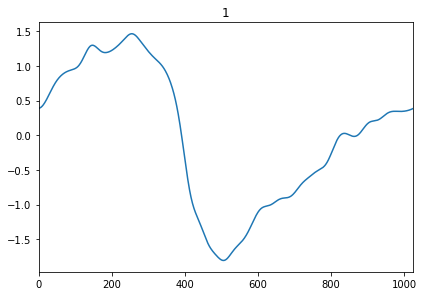

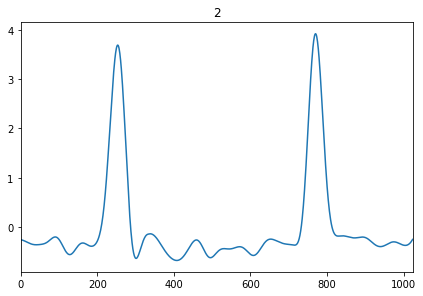

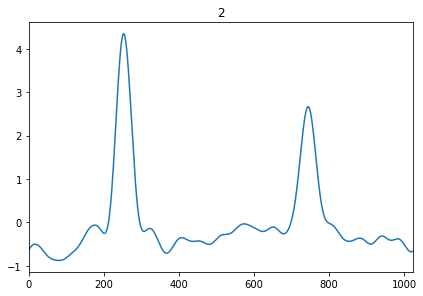

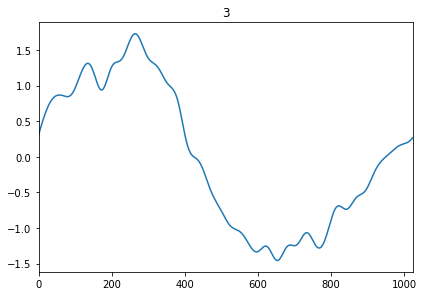

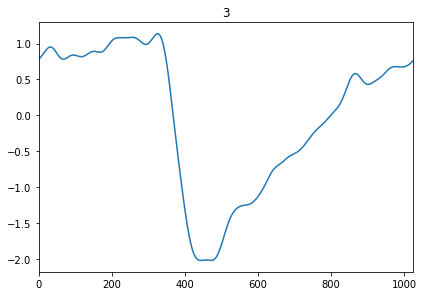

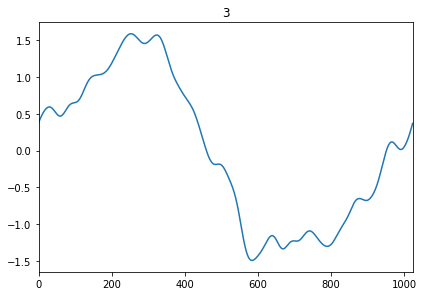

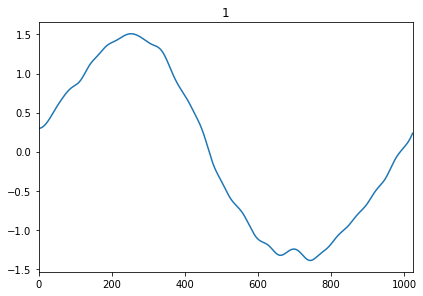

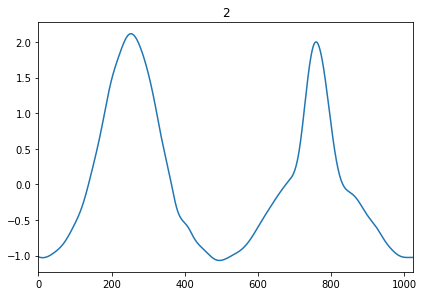

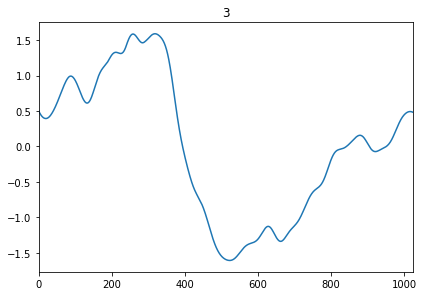

In [0]:
train_dl.show_batch()

In [0]:
def is_none(o):
    return o in [[], [None], None]

def ifisnoneelse(a, b, c):
    "`b` if `a` is None else `c`"
    return b if is_none(a) else c

In [0]:
class NumpyDatasets():
    _xtype, _ytype = torch.Tensor, None # Expected X and y output types. None means the same created by X, y + tfms
    
    def __init__(self,X,y=None,tls=None,ptls=None,tfms=None,sel_vars=None,sel_steps=None,splits=None,split=None,split_idx=None,
                 preprocess=False,types=None, **kwargs):
        self.X,self.y,self.splits,self.split_idx,self.types = X,y,splits,split_idx,types
        self.sel_vars = slice(None) if sel_vars is None else sel_vars
        self.sel_steps = slice(None) if sel_steps is None else sel_steps
        self.split = ifnone(split,np.array(split))
        if not tls:
            items = tuple((X,)) if y is None else tuple((X, y))
            tfms = L(ifnone(tfms,[None]*len(items)))
            tls = L([TfmdLists(item, t, **kwargs) for item,t in zip(items,tfms)])
            ptls = L([tl.items if is_none(tfm) else tl if not preprocess else np.stack(tl[:]) for tl,tfm in zip(tls,tfms)])
            self.types = [type(tl[0]) for tl in tls]
            if self._xtype is not None: self.types[0] = self._xtype
            if y is not None and self._ytype is not None: self.types[1] = self._ytype
        self.tls,self.ptls = tls,ptls
        
    def __getitem__(self, it):
        it = it if self.split is None else self.split[it] 
        return tuple([typ(ptl[it][self.sel_vars, self.sel_steps] if i==0 else ptl[it]) for i,(ptl,typ) in enumerate(zip(self.ptls,self.types))])

    def __getattr__(self,k): return gather_attrs(self, k, 'tls')
    def __dir__(self): return super().__dir__() + gather_attr_names(self, 'tls')
    def __len__(self): return len(self.tls) if self.split is None else len(self.split)
    def __iter__(self): return (self[i] for i in range(len(self)))
    def __repr__(self): return coll_repr(self)
    def decode(self, o, full=True): return tuple(tl.decode(o_, full=full) for o_,tl in zip(o,tuplify(self.tls, match=o)))
    def subset(self, i): 
        if self.splits is None: self.splits = [np.arange(len(self.X))]
        return type(self)(X=self.X, y=self.y, tls=self.tls, ptls=self.ptls, sel_vars=self.sel_vars,sel_steps=self.sel_steps, 
                          split=self.splits[i], types=self.types, split_idx=i)
    @property
    def train(self): return self.subset(0)
    @property
    def valid(self): return self.subset(1)
    

class TSDatasets(NumpyDatasets):
    _xtype, _ytype = TSTensor, None # Expected X and y output types. None means the same created by X, y + tfms
    
class NumpyDataLoader(TfmdDL):
    do_item = noops
    def __init__(self, dataset, num_workers=0, **kwargs):
        super().__init__(dataset, num_workers=num_workers, **kwargs)
    
    def create_batch(self, b): return self.dataset[b]
    
    @property
    def vars(self): return self.dataset[0][0].shape[-2]
    
    @property
    def len(self): return self.dataset[0][0].shape[-1]

    @delegates(plt.subplots)
    def show_batch(self, b=None, max_n=9, nrows=3, ncols=3, figsize=(12, 10), **kwargs):
        if b is None: b = self.one_batch()
        db = self.decode_batch(b, max_n=max_n)# if self.dataset.tfms is not None else b
        if nrows is None: 
            sqrt = math.sqrt(len(db))
            rows = min(math.ceil(sqrt), len(db)) 
        if ncols is None: ncols = len(db) // rnows
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize,  **kwargs)
        for tup, ax in zip(db[:nrows ** 2], [axs] if nrows == 1 else axs.flatten()): 
            show_tuple(tup, ax=ax)
        plt.tight_layout()

#     def test_dl(self:DataLoaders, test_items, rm_type_tfms=None, with_labels=False, **kwargs):
#         "Create a test dataloader from `test_items` using validation transforms of `dls`"
#         test = test_set(self.valid, test_items, rm_tfms=rm_type_tfms, with_labels=with_labels
#                         ) if isinstance(self.valid, (Datasets, NumpyDatasets, TfmdLists)) else test_items
#         return self.valid.new(test, **kwargs)


@delegates(plt.subplots)
def show_tuple(tup, ax=None, **kwargs):
    "Display a timeseries plot from a tuple"
    tup[0].show(title='unlabeled' if len(tup) == 1 else tup[1], ax=ax, **kwargs)
    
class TSDataLoader(NumpyDataLoader): pass

In [0]:
bs = 128
idx = np.random.randint(len(X_in_memory), size=bs)
train_idx = np.random.randint(len(splits[0]), size=bs)
valid_idx = np.random.randint(len(splits[1]), size=bs)

In [74]:
tfms = [None,[Categorize()]]
dsets = TSDatasets(X_on_disk, y_on_disk, tfms=tfms, splits=splits, preprocess=True)
train_ds = dsets.train
valid_ds = dsets.valid
valid_ds[0]

(TSTensor(vars:1, len:1024), TensorCategory(1))

In [76]:
train_dl = TSDataLoader(dsets.train, bs=64, shuffle=True)
valid_dl = TSDataLoader(dsets.valid, bs=128)
dls = TSDataLoaders(train_dl, valid_dl)
b = dls.one_batch()
b

(TSTensor(samples:64, vars:1, len:1024),
 TensorCategory([1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2,
         2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2,
         1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2]))

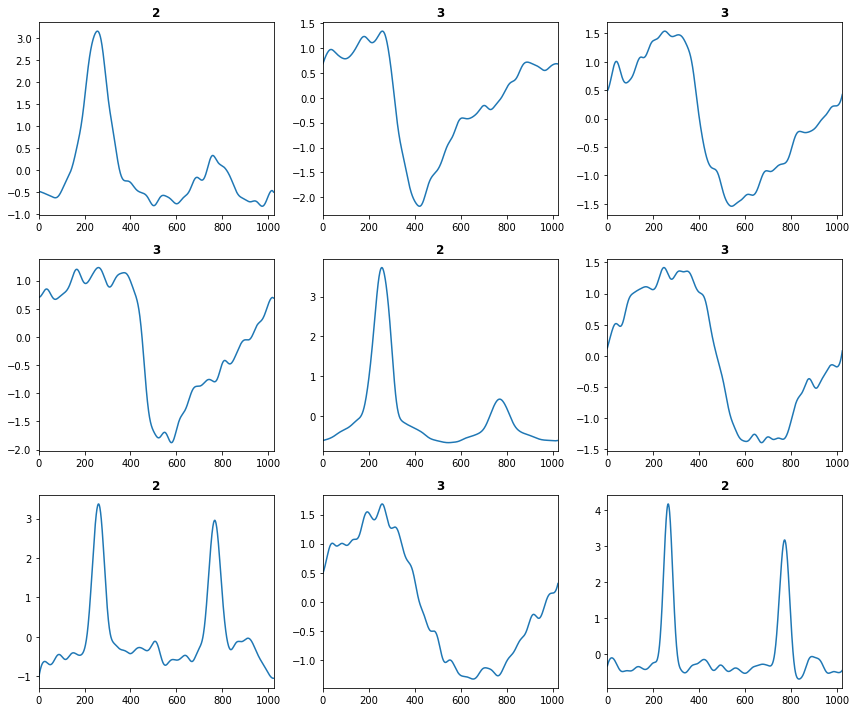

In [19]:
dls.show_batch()

In [22]:
%timeit tuple((TSTensor(X_on_disk[valid_idx]),))

The slowest run took 8.99 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 113 µs per loop


In [0]:
%timeit tuple((TSTensor(X_on_disk[valid_idx]),))

189 µs ± 289 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit tuple((TSTensor(X_in_memory[valid_idx]), TensorCategory(y_in_memory[valid_idx])))

10000 loops, best of 3: 167 µs per loop


In [0]:
%timeit tuple((TSTensor(X_in_memory[valid_idx]), TensorCategory(y_in_memory[valid_idx])))

358 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%timeit valid_ds[valid_idx]

The slowest run took 17.98 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 195 µs per loop


In [25]:
%timeit cycle_dl(valid_dl)

1 loop, best of 3: 153 ms per loop


In [55]:
valid_dl = TSDataLoader(dsets.valid, num_workers=0, bs=128)
%timeit cycle_dl(valid_dl)

10 loops, best of 3: 31.4 ms per loop


In [51]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X_in_memory, y_in_memory, tfms=tfms, splits=splits, preprocess=True)
train_ds = dsets.train
valid_ds = dsets.valid
train_dl = TSDataLoader(train_ds, bs=64, shuffle=True, drop_last=True, num_workers=0)
valid_dl = TSDataLoader(valid_ds, bs=128, num_workers=0)
dls   = TSDataLoaders(train_dl, valid_dl, device=default_device())

In [39]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X_in_memory, y_in_memory, tfms=tfms, splits=splits, preprocess=True)
train_ds = dsets.train
valid_ds = dsets.valid
train_dl = TSDataLoader(train_ds, bs=64, shuffle=True, drop_last=True, num_workers=0)
valid_dl = TSDataLoader(valid_ds, bs=128, num_workers=0)
dls   = TSDataLoaders(train_dl, valid_dl, device=default_device())
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
start = time.time()
learn.fit_one_cycle(25, lr_max=1e-3)
print(time.time() - start)

epoch,train_loss,valid_loss,accuracy,time
0,1.006026,1.114344,0.279869,00:02
1,0.778490,0.697026,0.830379,00:02
2,0.635966,0.420990,0.847135,00:02
3,0.532694,0.516873,0.847620,00:02
4,0.455656,0.367150,0.843613,00:02
5,0.371754,0.450469,0.806702,00:02
6,0.312494,0.165629,0.956532,00:02
7,0.265865,0.415868,0.835600,00:02
8,0.233476,0.303610,0.878339,00:02
9,0.204284,0.245093,0.873604,00:02


73.91352415084839


In [80]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X_on_disk, y_on_disk, tfms=tfms, splits=splits, preprocess=False)
train_dl = TSDataLoader(dsets.train, bs=64, shuffle=True, drop_last=True, num_workers=0)
valid_dl = TSDataLoader(dsets.valid, bs=128, num_workers=0)
dls   = TSDataLoaders(train_dl, valid_dl, device=default_device())
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
start = time.time()
learn.fit_one_cycle(25, lr_max=1e-3)
print(time.time() - start)

epoch,train_loss,valid_loss,accuracy,time
0,0.821593,1.067265,0.279869,00:03
1,0.668346,0.759731,0.839728,00:03
2,0.560868,0.428599,0.849320,00:03
3,0.470700,0.473362,0.843613,00:03
4,0.395124,1.286744,0.855027,00:03
5,0.329436,0.518763,0.750971,00:03
6,0.277996,0.561171,0.852598,00:03
7,0.237777,0.405165,0.855148,00:03
8,0.202917,0.140915,0.967217,00:03
9,0.178130,0.104786,0.974138,00:03


97.20103907585144


In [81]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X_on_disk, y_on_disk, tfms=tfms, splits=splits, preprocess=True)
train_dl = TSDataLoader(dsets.train, bs=64, shuffle=True, drop_last=True)
valid_dl = TSDataLoader(dsets.valid, bs=128)
dls   = TSDataLoaders(train_dl, valid_dl, device=default_device())
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
start = time.time()
learn.fit_one_cycle(25, lr_max=1e-3)
print(time.time() - start)

epoch,train_loss,valid_loss,accuracy,time
0,0.746579,1.032044,0.802210,00:02
1,0.597147,0.666095,0.838150,00:02
2,0.505607,0.410349,0.852113,00:02
3,0.427439,0.673875,0.850534,00:02
4,0.351274,0.641285,0.856727,00:02
5,0.290870,0.880155,0.524041,00:02
6,0.241252,0.215841,0.913915,00:02
7,0.207014,0.171816,0.939898,00:02
8,0.177090,0.114521,0.972074,00:02
9,0.155704,0.105397,0.967460,00:02


KeyboardInterrupt: ignored

In [70]:
dsets.train.ptls[1]

array([2, 2, 0, ..., 0, 1, 2])

In [0]:
# Native Pytorch
class PytorchDataset():
    def __init__(self, X, y=None, sel_vars=None, sel_steps=None):
        self.X, self.y = X, y
        self.sel_vars =  slice(None) if sel_vars is None else sel_vars
        self.sel_steps =  slice(None) if sel_steps is None else sel_steps

    def __getitem__(self, idx):
        return (self.X[idx, self.sel_vars, self.sel_steps], ) if self.y is None \
        else (self.X[idx, self.sel_vars, self.sel_steps], self.y[idx])

    def __len__(self):
        return len(self.X)

@torch.utils.data.DataLoader
def to(self, device):
    self.device = device
    return self

In [53]:
train_ds = PytorchDataset(np.array(X_train), np.array(y_train))
valid_ds = PytorchDataset(np.array(X_valid), np.array(y_valid))
train_dl = torch.utils.data.DataLoader(dataset=train_ds, batch_size=64, shuffle=True, drop_last=True)
valid_dl = torch.utils.data.DataLoader(dataset=valid_ds, batch_size=128)
dls   = TSDataLoaders(train_dl, valid_dl, device=default_device())
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
start = time.time()
learn.fit_one_cycle(25, lr_max=1e-3)
print(time.time() - start)

AttributeError: ignored

In [49]:
%timeit cycle_dl(valid_dl)

10 loops, best of 3: 45.3 ms per loop


In [0]:
class NumpyDatasets(FilteredBase):
#     xtype = None
    "A dataset that creates a tuple from X (and y), and applies `item_tfms`"
    def __init__(self, X=None, y=None, items=None, sel_vars=None, sel_steps=None, 
                 tfms=None, tls=None, n_inp=None, dl_type=None, preprocess=False, xtype=None, 
                 splits=None, split=None, split_idx=None, **kwargs):
        super().__init__(dl_type=dl_type)
        self.X,self.y,self.split = X,y,split
        self.splits = [np.arange(len(X))] if splits is None else splits
        self.sel_vars =  slice(None) if sel_vars is None else sel_vars
        self.sel_steps =  slice(None) if sel_steps is None else sel_steps
        
        if not tls:
            items = tuple((X,)) if y is None else tuple((X, y))
            tfms = L(ifisnotnone(tfms,[None]*len(items)))
        self.tls = L(tls if tls else [TfmdLists(item, t, **kwargs) for item,t in zip(items, L(ifnone(tfms,[None]*len(items))))])
        self.ptls = [tl.items if is_none(tl.tfms) else tl if not preprocess else np.stack(tl[:]) for tl in self.tls]
        types = [type(tl[0]) for tl in self.tls]
        if xtype is not None: types[0] = xtype
        self.types = types
        self.preprocess = preprocess
        
        self.n_inp = (1 if len(self.tls)==1 else len(self.tls)-1) if n_inp is None else n_inp

    def __getitem__(self, it):
        if self.split is not None: it = self.split[it]
        return tuple([cast(ptl[it, self.sel_vars, self.sel_steps] if i==0 else ptl[it],typ) for i, (ptl,typ) in enumerate(zip(self.ptls, self.types))])
    
    def __getattr__(self,k): return gather_attrs(self, k, 'tls')
    def __dir__(self): return super().__dir__() + gather_attr_names(self, 'tls')
    def __len__(self): return len(self.tls[0])
    def __iter__(self): return (self[i] for i in range(len(self)))
    def __repr__(self): return coll_repr(self)
    def decode(self, o, full=True): return tuple(tl.decode(o_, full=full) for o_,tl in zip(o,tuplify(self.tls, match=o)))
    def subset(self, i): return type(self)(X=self.X, y=self.y, sel_vars=self.sel_vars, sel_steps=self.sel_steps, 
                                           tls=self.tls, n_inp=self.n_inp, preprocess=self.preprocess, xtype=self.types[0], 
                                           split=self.splits[i], split_idx=i)
    def _new(self, items, *args, **kwargs): return super()._new(items, tfms=self.tfms, do_setup=False, **kwargs)
    def overlapping_splits(self): return self.tls[0].overlapping_splits()
    def new_empty(self): return type(self)(tls=[tl.new_empty() for tl in self.tls], n_inp=self.n_inp)
#     @property
#     def splits(self): return self.tls[0].splits
    @property
    def split_idx(self): return self.tls[0].tfms.split_idx
    @property
    def items(self): return self.tls[0].items
    @items.setter
    def items(self, v):
        for tl in self.tls: tl.items = v

    def show(self, o, ctx=None, **kwargs):
        for o_,tl in zip(o,self.tls): ctx = tl.show(o_, ctx=ctx, **kwargs)
        return ctx

    @contextmanager
    def set_split_idx(self, i):
        old_split_idx = self.split_idx
        for tl in self.tls: tl.tfms.split_idx = i
        yield self
        for tl in self.tls: tl.tfms.split_idx = old_split_idx
            
            
class TSDataLoader(TfmdDL):
    do_item = noops
    def __init__(self, dataset, num_workers=0, **kwargs):
        super().__init__(dataset, num_workers=num_workers, **kwargs)
    def create_batch(self, b): return self.dataset[b]

In [0]:
tfms = [None,[Categorize()]]
dsets = NumpyDatasets(X_on_disk, y_on_disk, tfms=tfms, preprocess=True, splits=splits, xtype=TSTensor)
train_ds = dsets.train
valid_ds = dsets.valid


In [0]:
valid_ds.tfms

(#2) [Pipeline: ,Pipeline: Categorize]

In [0]:
dsets[idx]

(TSTensor(samples:128, vars:1, len:1024),
 TensorCategory([2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1,
         2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
         2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2,
         0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
         2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0,
         1, 2, 2, 2, 2, 0, 0, 1]))

In [0]:
train_ds[0][0].data, X_on_disk[0]

(tensor([[0.5373, 0.5311, 0.5285,  ..., 0.5264, 0.5195, 0.5114]]),
 memmap([[0.5373029 , 0.53110296, 0.52850294, ..., 0.52640295, 0.51950294,
          0.51140296]], dtype=float32))

In [0]:
Datasets??